In [2]:
!pip install nnunetv2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [3]:
import nnunetv2


In [6]:
mkdir -p /kaggle/working/nnUNet_results/Dataset500_KiTS2023/

In [7]:
mkdir -p /kaggle/working/nnUNet_raw

In [8]:
mkdir -p /kaggle/working/nnUNet_preprocessed

In [ ]:
!cp -r /kaggle/input/nnunet2nd/pytorch/default/1/pretrained_models/nnUNetTrainer__nnUNetPlans__3d_fullres_batch_4_all /kaggle/working/nnUNet_results/Dataset500_KiTS2023/


In [4]:
import os

# Raw data (can be empty if you only do inference)
os.environ["nnUNet_raw"] = "/kaggle/working/nnUNet_raw"

# Preprocessed data (can be empty if you only do inference)
os.environ["nnUNet_preprocessed"] = "/kaggle/working/nnUNet_preprocessed"

# Model results folder (where your Dataset700_MYTASK lives)
os.environ["nnUNet_results"] = "/kaggle/working/nnUNet_models"


In [ ]:
mkdir -p /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/

In [9]:
!mv /kaggle/working/nnUNet_results /kaggle/working/nnUNet_models 


In [ ]:
mkdir -p /kaggle/working/results

In [19]:
import os

file_path = "/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/segmentation.nii.gz"

if os.path.exists(file_path):
    os.remove(file_path)
    print("✅ File deleted:", file_path)
else:
    print("❌ File not found:", file_path)


✅ File deleted: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/segmentation.nii.gz


In [18]:
import shutil

folder_path = "/kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances"

# Remove the folder and everything inside
shutil.rmtree(folder_path)


In [11]:
!cp -r /kaggle/input/nnunet2nd/pytorch/default/1/pretrained_models/nnUNetTrainer__nnUNetPlans__3d_fullres_batch_4_all /kaggle/working/nnUNet_models/Dataset500_KiTS2023/

In [12]:
import os
import shutil
from pathlib import Path

# === Input dataset path ===
src_dataset = "/kaggle/input/kits23-00/collected_imaging"

# === Output path for flattened .nii.gz files ===
output_dir = "/kaggle/working/nnUNet_raw/Dataset500_KiTS2023"
os.makedirs(output_dir, exist_ok=True)

# === Flatten all folders and save .nii.gz files ===
case_counter = 0
for folder in sorted(os.listdir(src_dataset)):
    folder_path = os.path.join(src_dataset, folder)
    if os.path.isdir(folder_path):
        nii_files = list(Path(folder_path).glob("*.nii*"))
        if not nii_files:
            continue

        nii_file = nii_files[0]  # pick the main file (e.g., image.nii.gz)
        new_name = f"case_{case_counter:05d}_0000.nii.gz"
        new_path = os.path.join(output_dir, new_name)

        shutil.copy(str(nii_file), new_path)
        case_counter += 1

print(f"✅ Flattened {case_counter} cases to {output_dir}")


✅ Flattened 20 cases to /kaggle/working/nnUNet_raw/Dataset500_KiTS2023


In [16]:
import gdown
output_path = "/kaggle/working/output/"

# Google Drive file ID
file_id = "18CvIh2F5lvmfpN_8ghny8Wtz3x-4Idfn"
url = f"https://drive.google.com/uc?id={file_id}"

# Download
gdown.download(url, output_path, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=18CvIh2F5lvmfpN_8ghny8Wtz3x-4Idfn
From (redirected): https://drive.google.com/uc?id=18CvIh2F5lvmfpN_8ghny8Wtz3x-4Idfn&confirm=t&uuid=23217b43-d426-4631-b858-20bcd693ddba
To: /kaggle/working/output/14_zipped.zip
100%|██████████| 188M/188M [00:01<00:00, 105MB/s]  


'/kaggle/working/output/14_zipped.zip'

In [17]:
!unzip /kaggle/working/output/14_zipped.zip -d /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/


Archive:  /kaggle/working/output/14_zipped.zip
   creating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances/
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/segmentation.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances/tumor_instance-1_annotation-3.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances/kidney_instance-1_annotation-1.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances/kidney_instance-2_annotation-1.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances/tumor_instance-1_annotation-2.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances/kidney_instance-2_annotation-2.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/instances/kidney_instance-1_annotation-3.nii.gz  
  inflating: /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/insta

In [21]:
!mv /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_014_00000.nii.gz /kaggle/working/nnUNet_raw/Dataset500_KiTS2023/imaging_014_0000.nii.gz

In [22]:
!nnUNetv2_predict -i /kaggle/working/nnUNet_raw/Dataset500_KiTS2023 -o /kaggle/working/results/ -d 500 -c 3d_fullres_batch_4_all -f all


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

/usr/local/lib/python3.11/dist-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "
There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start

In [ ]:
!mv /kaggle/working/nnUNet_models/Dataset700_kits23/nnUNetTrainer__nnUNetPlans__3d_lowres_plain_all  /kaggle/working/nnUNet_models/Dataset700_kits23/nnUNetTrainer__nnUNetPlans__3d_lowres

Shape: (439, 512, 512)


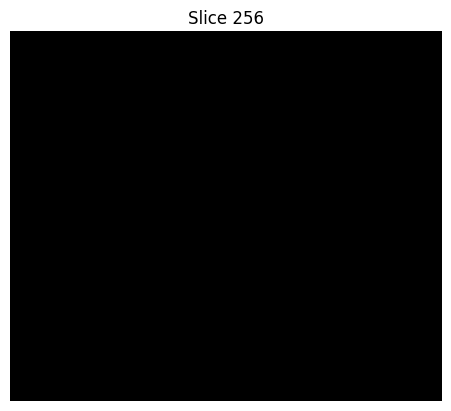

In [26]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Path to your file
nii_path = "/kaggle/working/results/imaging_014.nii.gz"

# Load the image
img = nib.load(nii_path)
data = img.get_fdata()

# Check shape
print("Shape:", data.shape)

# Show middle slice
slice_index = 256  # middle slice in Z-axis
plt.imshow(data[:, :, slice_index], cmap="gray")
plt.title(f"Slice {slice_index}")
plt.axis("off")
plt.show()


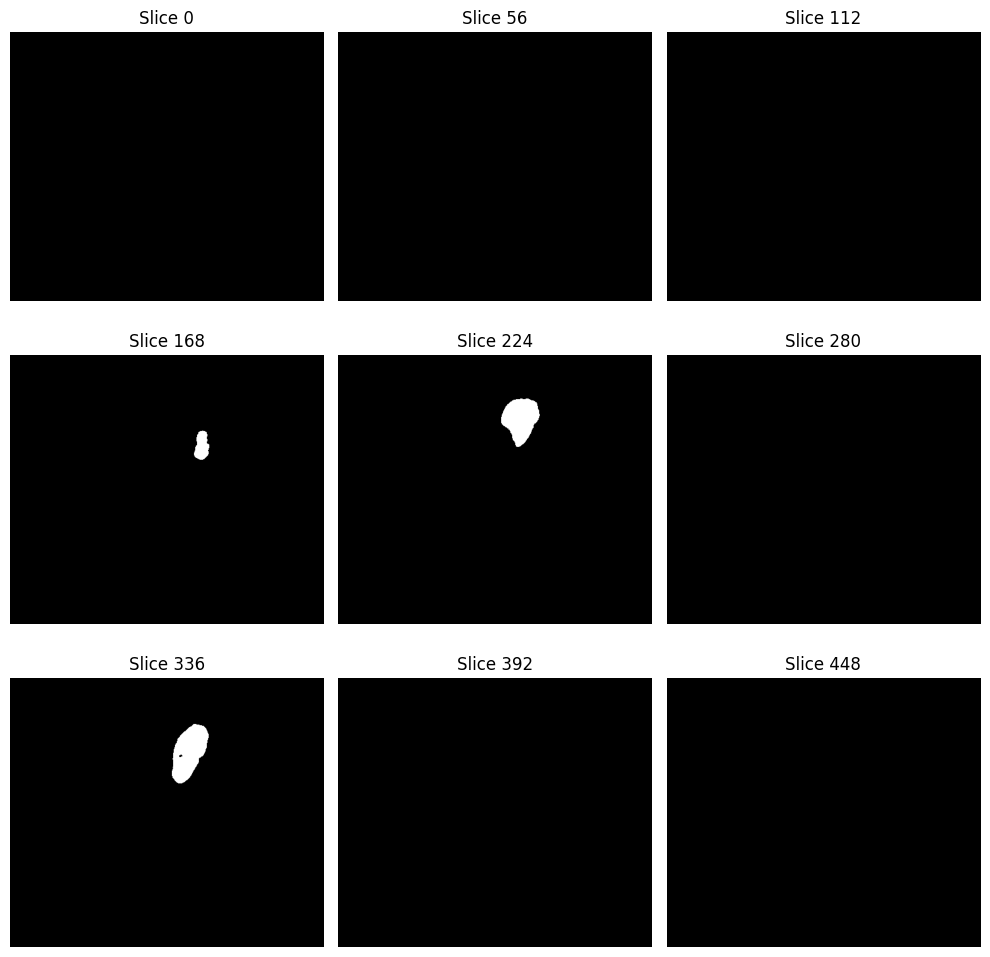

In [27]:
num_slices = 9
step = data.shape[2] // num_slices
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[:, :, i * step], cmap="gray")
    ax.set_title(f"Slice {i * step}")
    ax.axis("off")
plt.tight_layout()
plt.show()
